<div class="alert alert-info" role="alert">
    
Setup
--------------------------------------
    
</div>

HERE 73 mins

In [58]:
##
## Use Ward's Minimum Variance Linkage Method with a Euclidean distance measure.
##
ward = shc.linkage( df_hclusters, method = 'ward' )
##
## Plot a dendogram (fancy word for upside-down tree)
## WARNING: this will take a minute

## this would be something to experiment with. In the interest of time 
## I've done this for you, but feel free to experiment, which is what you 
## would do in the real world.  
max_dist = 23


plt.figure( figsize = ( 10, 7  ) )  
plt.title( 'CID Clustering\nHierarchical Clustering Dendrogram\nWard\'s Method' )
plt.xlabel( 'Customer (CID)' )
plt.ylabel( 'Distance' )
plt.text( 2500, 23.5, 'Cut-off Line' )
##
shc.dendrogram( ward )
plt.axhline( y = max_dist, c = 'black', ls = '-', lw = 1.5 );
##
## Document dendrogram
##
rec_lst = [ [ (20, 14 ), 500, 4 ], [ (800, 17 ), 1200, 3 ], [ (3600, 17 ), 1350, 4 ],
          [ (5900, 18 ), 1600, 4 ]  ]
txt_lst = [ 100, 1100, 4000, 6300 ]
for i in range( len( rec_lst ) ):
    x = rec_lst[ i ]
    rectangle = plt.Rectangle( x[ 0 ], x[ 1 ], x[ 2 ], fill = None, ec = "black", lw = 3 )
    plt.gca().add_patch(rectangle)
    plt.text( txt_lst[ i ], 23.5, 'Cluster ' + str( i + 1 ) )


NameError: name 'shc' is not defined

### What is this showing me?  

A horizontal line is drawn at a distance of 23 (totally arbitrary...but it gives me 4 clusters...which feels about right to me).  Any cluster formed below this line is a group.  Also notice that there are four groups.    

>>What is the right number of clusters?  Dunno.  It's _Prunes Analysis_.  But maybe 4-6 is a good place to start if you don't have _a priori_ knowledge.  

Here we use _fcluster_ to _flatten the cluster_ so we get the number of clusters we want.  Now we can look at the individual customers in the clusters and do some _Design Thinking_ with our marketing folks.  

In [59]:
##
## Identify the CIDs in each cluster
## Consider any cluster grouping formed below 23
##
cluster_labels = fcluster( ward, max_dist, criterion = 'distance' )
df_hclusters[ 'Cluster_Number' ] = cluster_labels

display( df_hclusters.head().style.set_caption( 'DataFrame with Cluster Assignment Number' ).\
    set_table_styles( tbl_styles ).hide_index().format( format_dict ) )

NameError: name 'fcluster' is not defined

In [60]:
##
## Examine the cluster size distribution
##
df_hclusters[ 'Cluster' ] = [ 'Cluster ' + str( x ) for x in df_hclusters.Cluster_Number ]
display( df_hclusters.stb.freq( [ 'Cluster' ] ).style.set_caption( 'Cluster Distribution' ).\
    set_table_styles( tbl_styles ).\
    bar( subset = [ 'count' ], align='mid', color = 'red').hide_index().\
        format( {'percent':'{0:.4}%', 'cumulative_percent':'{0:.4}%'} ) )

NameError: name 'df_hclusters' is not defined

In [61]:
##
## Create a boxplot for each cluster for Order Discount
##
ax = sns.boxplot( x = 'Cluster_Number', y = 'meanOdisc', data = df_hclusters )
ax.set_title( 'Order Discount\nby Clusters\nHierarchical Clustering', fontsize = font_title )
ax.set( xlabel = 'Clusters', ylabel = 'Order Discount' )
base = 'Base: All data; n = ' + str( df_hclusters.shape[ 0 ] )
footer();

NameError: name 'df_hclusters' is not defined

<div class="alert alert-danger" role="alert">
  <center><h1><strong><font color = black>Exercises</center></h1></strong>
    
[Back to Contents](#Contents)
</div>


### Exercise II.1
this might be good for a second example...


[Back to Contents](#Contents)

Import a *CSV* data set of bank customers.  The *CSV* file is named *BankChurners.csv*.  HINT: Use *pd.read_csv*.  Call the imported DataFrame *df_bank*.   

| Variable  | Values  | Source  | Mnemonic |
|-----------|---------|---------|----------|
| Customer ID | Unique identifier | Bank | CID |
| Attrition Flag | String: Existing Customer, Attrited Customer | Bank | Attrition_Flag | 
| Customer Age | Integer | Bank | Age | 
| Customer Gender | Single Character: F = Female, M = Male | Bank | Gender |
| Number of Household Dependents | Interger: 0, 1, 2, ... | Bank | Dependent_count |
| Education Level | String | Bank | Education_Level |
| Marital Status | String | Bank | Marital Status |
| Income Category | String | Bank | Income_Category |
| Type of Bank Card | String | Bank | Card_Category |
| Months as Customer | Integer | Bank | Months_on_Book |
| Total Number of Products Held by Customer | Integer | Bank | Total_Relationship_Count |
| No. of Months Inactive in Last 12 Months | Integer | Bank | Months_Inactive_12_mon |
| No. of Contacts in Last 12 Months | Interger: 0, 1, 2, ... | Bank | Contacts_Count_12_mon |
| Credit Limit on the Credit Card | Integer | Bank | Credit_Limit |
| Total Revolving Balance on the Credit Card | Integer | Bank | Total_Revolving_Bal |
| Open to Buy Credit Line (Average of last 12 months) | Integer | Bank | Avg_Open_To_Buy |
| Change in Transaction Amount (Q4 over Q1) | Float | Bank | Total_Amt_Chng_Q4_Q1 |
| Total Transaction Amount (Last 12 months) | Integer | Bank |
| Total Transaction Count (Last 12 months) | Integer | Bank | Total_Trans_Amt |
| Change in Transaction Count (Q4 over Q1) | Float | Bank | Total_Ct_Chng_Q4_Q1 |
| Average Card Utilization Ratio | Float | Bank | Avg_Utilization_Ratio |

Use the following demographic variables to create a Hierarchical Cluster of the bank customers:

>- Age
>- Gender
>- Card_Category

This problem is a little tricky.  First, I recommend subsetting the three variables into a temporary DataFrame: *tmp*.  Second, *Gender* and *Card_Category* are character strings so they have to be recoded.  You can use a list comprehension to recode both.  Suggestions:
>- tmp[ 'Gender' ] = [ 1 if x == 'M' else 0 for x in tmp.Gender ]
>- tmp[ 'Card_Category' ] = [ 1 if x == 'Blue' else 2 if x == 'Silver' else 3 if x == 'Gold' else 4 for x in tmp.Card_Category ]

Finally, the DataFrame is very large, so I recommend taking a random sample of $n = 500$.  You can use:

>- smpl = tmp.sample( n = 500, random_state = 42, replace = False )

[See Solution](#Solution-II.1)

In [ ]:
##
## Enter code here
##


In [ ]:
##
## Enter code here
##


## KMeans Clustering Approach


K-Means is another popular clustering method.  With K-means you have to declare the number of clusters, known as _k_.  `k=4` means you want 4 clusters based on your numeric features:  Sales, Pocket Price, and the four Discounts.

Process:

* declare k (the seed, or initial, clusters)
* group objects based on their shortest distance from the seeds
* create new seeds as the _mean_ (or _centroid_) of the groups.  
* merge an object (customer) into each group based on the shortest distance to the centroid
* repeat until all customers are assigned to the _k_ groups.  

>>When would you use this?  When you think you know the number of groups you want _a priori_.  But again, you can always experiment


In [ ]:
##
## Set up data 
##
cols = [ 'Region', 'totalUsales', 'meanPprice', 'meanDdisc', 'meanCdisc', 'meanPdisc', 'meanOdisc' ]
df_kclusters = df_agg[ cols ].copy()
##
display( df_kclusters.head().style.set_caption( 'K-Means Clustering Data' ).\
    set_table_styles( tbl_styles ).hide_index().format( format_dict ) )

In [ ]:
##
## Subset the data for all numerics.  We remove the region, it doesn't appear to be needed.  
##
cols = [ 'totalUsales', 'meanPprice', 'meanDdisc', 'meanCdisc', 'meanPdisc', 'meanOdisc' ]
tmp = df_kclusters[ cols ]
##
## Do K-Means
## why 42?  We need something to make it repeatable.  

kmeans = KMeans( n_clusters = 4, random_state = 42 ).fit( tmp )

**_Code Explanation_**

The kmeans centers are retrieved using the method *cluster_centers_*

In [ ]:
## 
## Add cluster labels to main cluster DataFrame
##
df_kclusters[ 'Cluster_Number' ] = kmeans.labels_   ## Notice the ending underscore
##
display( df_kclusters.head().style.set_caption( 'DataFrame with K-Means Cluster Assignments' ).\
    set_table_styles( tbl_styles ).hide_index().format( format_dict ) )

**_Code Explanation_**

The kmeans cluster numbers are retrieved using the method *labels_*.  Notice the underscore.

In [ ]:
##
## Examine the cluster size distribution
##
df_kclusters[ 'Cluster' ] = [ 'Cluster ' + str( x ) for x in df_kclusters.Cluster_Number ]
display( df_kclusters.stb.freq( [ 'Cluster' ] ).style.set_caption( 'Cluster Distribution' ).\
    set_table_styles( tbl_styles ).\
    bar( subset = [ 'count' ], align='mid', color = 'red').hide_index().format( {'percent':'{0:.4}%', 'cumulative_percent':'{0:.4}%'} ) )

In [ ]:
##
## Create a boxplot for each cluster for Order Discount
##
ax = sns.boxplot( x = 'Cluster_Number', y = 'meanOdisc', data = df_kclusters )
ax.set_title( 'Order Discount\nby Clusters\nK-Means Clustering', fontsize = font_title )
ax.set( xlabel = 'Clusters', ylabel = 'Order Discount' )
base = 'Base: All data; n = ' + str( df_hclusters.shape[ 0 ] )
footer();

We would now do some _Design Thinking_ among our analysts and sales teams.  Are these the _right_ clusters for what we want to accomplish?  This is worth a discussion and exploration.   More on this next...


### Exercise II.2

[Back to Contents](#Contents)

Use the bank DataFrame to do a K-Means clustering.  Use the following numeric variables:

>- Months_on_Book
>- Total_Relationship_Count
>- Months_Inactive_12_mon
>- Contacts_Count_12_mon
>- Credit_Limit

Use a random sample of $n = 500$.

[See Solution](#Solution-II.2)

In [ ]:
##
## Enter code here
##


In [ ]:
##
## Enter code here
##


## What can we do with these clusters?

_Design Thinking_ with your marketing people.  

* _What do we do next_ is a key tenant of `Prescriptive Analytics` and this information is not something easily conveyed on a Power BI dashboard (imo).  
* Do some _profiling_.  What are these clusters telling us?  Maybe look at some sample customers from a "Customer 360" perspective.  What are their common traits?  
* Now you can name the clusters/profiles.  Without a good, descriptive, meaningful, generic name that we can agree on, your clusters are meaningless. 

There is an art to naming.  Imagine you are a clothing retailer.  Some clusters might be: 
   * Fashion Aware
   * Balanced Buyer
   * Indulgent Expressives
   * Fashionista

## Churn Analytics

_Churn_ is the loss of customers, their revenue, and higher CAC (customer acquisition costs) to replace them.  

Why do customers churn?

* price is too high
* poor product quality
* out-of-fashion products
* poor customer support
* poor online reviews
* etc etc etc

What we want to do is reduce churn by identifying/predicting potential churners and taking proactice steps to prevent or minimize churn.  

_There may be times when we WANT a customer to churn_  

Some churn is inevitable.  But we should be able to minimize it.  

Most companies do basic _descriptive analytics_ on churn:
* what is the rate-of-churn
* track lost revenue
* identify and track CAC

Some companies do _predictive analytics_:
* who are the most likely to churn?

Very few companies do _prescriptive analytics_:
* What do we do to minimize churn?
* How can we measure if our interventions are working?  

## Churn Case Study - Telecom

> I worked for `Comcast Cellular One` out of college (1997-ish) doing churn analytics.  I wasn't good at it and only lasted a few months.  The reason was simple...I could do the math but I couldn't do the _Prescriptive Analytics_.  This is very conversational between business domain experts and data professionals.  

The telecom industry was a monopoly until 1984 with the divestiture of AT&T.  Never before had customers "churned" from one telecom provider to another.  Suddenly, churn analytics was all the rage.  

Let's assume you are a telecom company with a historical database of customer metrics including:
* their telecom "usage"
* subscription services (internet, bundled products, online backup, security products)
* month-by-month subscriber vs annual contract
* an indicator as to whether the customer churned

The CEO was looking at a Power BI dashboard and noticed that 1 out of 4 customers leaves after some period of time.  (_Descriptive Analytics_).  This is a big problem when the numbers need to be reported to Wall Street.  The CAC in this industry is also VERY high.  

ASK:  Build a model to predict likely churns (_Predictive Analytics_) so that we can work with marketing and the domain experts to determine what some good strategies would be to _minimize_ churn.  (_Prescriptive Analytics_ or _what do we do next?_)

### General Process

* We need a data set of past customers, with their histories, and a _label_ as to whether they churned.  **This isn't easy and will likely take some time**.  
* Once we talk through the _features_ that are needed we'll have a trained _model_ that will tell us the probability that a customer will churn.  
* We want to run that against _current_ customers to identify the potential churners so we can determine how to prevent it. (the _treatment_)
* BONUS:  Really advanced companies will constantly "score" customers whenever something about those customers changes, in real-time.  This allows those companies to make proactive _treatments_ vs being reactive.  This takes time and requires a lot of Prescriptive Analysis.  


But first..._why_ are they churning?  

## Churn Data Dictionary


| Variable | Values | Source | Column Name |
|----------|--------|--------|----------|
| Customer ID | AlphaNumeric | IT | CID |
| Subscriber Gender | String: Male/Female | IT | gender |
| Senior Citizen Status | String: Yes/No | IT | seniorCitizen |
| Subscriber has Partner | String: Yes/No | IT | partner |
| Dependents in Household | String: Yes/No | IT | dependents |
| Tenure as Customer | Numeric: Months | IT | tenure |
| Have Phone Service | String: Yes/No | IT | phoneService |
| Have Multiple Phone Lines | String: Yes/No/No phone service | IT | multipleLines |
| Subscribe to Internet Service | String: No/Fiber Opic/DSL | IT | internetService |
| Subscribe to  Online Security | String: Yes/No/No Internet Service | IT | onlineSecurity |
| Subscribe to  Online Computer Backup | String: Yes/No/No Internet Service | IT | onlineBackup |
| Subscribe to  Device Protection Plan | String: Yes/No/No Internet Service | IT | deviceProtection |
| Subscribe to Tech Support | String: Yes/No/No Internet Service | IT | techSupport |
| Subscribe to Streaming TV | String: Yes/No/No Internet Service | IT | streamingTV |
| Subscribe to Streaming Movies | String: Yes/No/No Internet Service | IT | streamingMovies |
| Contract Type | String: Month-to-Month/One year/Two year | IT |contractType |
| Subscribe to Paperless Bill | String: Yes/No | IT | paperlessBilling |
| Payment Method | String: Bank transfer (automatic)/Credit card (automatic)/Electronic check/Mailed check | Billing | paymentMethod |
| Average Monthly Charges | Numeric: Dollars and Cents | Billing | monthlyCharges |
| Total Charges Over Tenure Time | Numeric: Dollars and Cents | Billing | totalCharges |
| Churned at any Time | String: Yes/No | Marketing | churn |


## Import, Examine, and Process the Churn Data

[Back to Contents](#Contents)


In [ ]:
##
## Set file name
##
file = 'churn.xlsx'
df_churn = pd.read_excel( path + file )
##
## Record churn from Yes/No to 1/0
##
df_churn[ 'Churn' ] = [ 1 if x == 'Yes' else 0 for x in df_churn.churn ]
##
## Display
##
display( df_churn.head().style.set_caption( 'Churn Data' ).set_table_styles( tbl_styles ).hide_index().\
       format( {'monthlyCharges':'${0:.2f}', 'totalCharges':'${0:,.2f}'} ) )

In [ ]:
df_size( df_churn )

In [ ]:
column_check( df_churn )

In [ ]:
mvReport( df_churn )

**Interpretation**

There are 11 cases with missing values for Total Charges.  There are several options to handle these cases:

>1. Drop the 11 cases.
>2. Replace with the mean Total Charges.
>3. Replace with the mean Total Charges of groups (e.g., Male, Senior Citizens, No Multiple Lines).
>4. Interpolate.
>5. Estimate an *OLS* model for Total Charges and predict the missing values.

See <a href="https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html#filling-missing-values-fillna" target="_parent">here</a> for methods in Pandas for handling missing values.

I will delete the 11 cases for this problem.

In [ ]:
##
## Drop records with NA values.
##
df_churn.dropna( axis = 0, inplace = True )
df_size( df_churn )

In [ ]:
##
## Subset data
##
data = df_churn[ 'churn' ].value_counts( normalize = True ).round( 3 )
data = pd.DataFrame( data )
base = 'Base: n = ' + str( df_churn.shape[ 0 ] )
display( data.style.set_caption( 'Churn Distribution' ).\
    bar( align = 'mid', color = 'red' ).format( '{:.1%}' ).\
    set_table_styles( tbl_styles ) )
print( base )

In [ ]:
##
## Plot tenure histogram
##
base = 'Base: All records; n = ' + str( df_churn.shape[ 0 ] )
ax = sns.distplot( df_churn.tenure )
ax.set_title( 'Tenure Distribution', fontsize = font_title )
footer();

**Interpretation**

The distribution is bimodal.  Recommendation: recode.

ie, we have a lot of new customers and a lot of old customers.  

In [ ]:
##
## Plot monthly charges histogram
##
ax = sns.distplot( df_churn.monthlyCharges )
ax.set_title( 'Monthly Charges Distribution', fontsize = font_title )
footer();

**Interpretation**

The distribution is trimodal.  Recommendation: recode.

In [ ]:
##
## Recode the two variables: tenure and monthly charges
##
df_churn[ 'tenureRecoded' ] = [ '<30' if x < 30 else '>=30' for x in df_churn.tenure ]
df_churn[ 'monthlyChargesRecoded' ] = [ '<30' if x < 30 else '>= 70' if x >= 70 
                                       else '30 - 70' for x in df_churn.monthlyCharges ]

## Train-Test Split the Churn Data

[Back to Contents](#Contents)


In [ ]:
##
## Use 75% train
##
churn_train, churn_test = train_test_split( df_churn, train_size = 0.75, random_state = 42 )
display( df_size( churn_train ) )
display( df_size( churn_test ) )

<div class="alert alert-danger" role="alert">
  <center><h1><strong><font color = black>Exercises</center></h1></strong>
    
[Back to Contents](#Contents)
</div>


### Exercise III.1

[Back to Contents](#Contents)

Split the Bank DataFrame into train and testing data sets using $\frac{3}{4}$ for training.

[See Solution](#Solution-III.1)

In [ ]:
##
## Enter code here
##


<div class="alert alert-danger" role="alert">
  <center><h1><strong><font color = black>End Exercises</center></h1></strong>
</div>

## Train a Churn Prediction Model

[Back to Contents](#Contents)

In [ ]:
##
## Select columns for training
##
cols = [ 'Churn', 'gender', 'tenureRecoded', 'contractType', 'monthlyChargesRecoded' ]
display( churn_train[ cols ].head().style.set_caption( 'Subsetted Training Data' ).set_table_styles( tbl_styles ) )

## How do we code a Churn Prediction Model

This is merely ONE way to do it.  We use _logistic regression_ by defining a formula for our churn.  

Here's the formula.  This notation is often called a `patsy model`:

```
Churn ~ C( gender, Sum ) + C( tenureRecoded, Sum ) + C( contractType, Sum ) + C( monthlyChargesRecoded, Sum )
```

Huh?  

Let's decode it:

* `Churn ~` :  think of it as "churn equals..."
* `C( gender, Sum )` :  gender has 2 possible values:  `Male` and `Female`.  Algorithms don't like to work on text and we know that gender is `categorical`.  `C` means `convert to categorical`.  `Sum` is a complicated way in econometrics to say, "every coefficient must sum to zero",.  In this case it just means `-1` is `female` and `1` is `male`.  We are _categorically-encoding a string value_
* do the same thing for `tenureRecoded`, `contratType`, and `monthlyChargesRecoded`


In [ ]:
##
## ===> Step 1: Define a formula <===
##
formula = 'Churn ~ C( gender, Sum ) + C( tenureRecoded, Sum ) + C( contractType, Sum ) + C( monthlyChargesRecoded, Sum )'


##  "instantiate" a model
##  This is logistic regression
mod = smf.logit( formula, data = churn_train )
##
## ===> Step 3: Fit the instantiated model <===
##
logit01 = mod.fit()
##
## ===> Step 4: Summarize the fitted model <===
##
display( logit01.summary() )

### Interpretation

* We are trying to maximize the `Log-Likelihood`.  
* In the process it generates a "pseudo" `R-squ`.  This is too much to explain here but `0.2314` simply can be interpreted as _23% of the variation in my target is accounted for in my model_.  That's not great, but it's a start.  
* `C(gender,Sum)[S.Female]` simply means that the coefficient for females is `0.0197`.  Since we used `Sum` we know that for males it is `-0.0197`.  
* the same can be said for `tenureRecoded` (below or above 30 months)
* `ContractType` has 3 categories but we only see two in the output.  To calculate the "two year" contract we simply add the two categories displayed and multiply by -1.  (So, `-1.26`)


<div class="alert alert-danger" role="alert">
  <center><h1><strong><font color = black>Exercises</center></h1></strong>
    
[Back to Contents](#Contents)
</div>


### Exercise III.2

[Back to Contents](#Contents)

Train a bank attrition (i.e., churn) model.  The dependent variable is *Attrition_Flag*.  Recode this as 1 if the account is closed; else 0.  Use a list comprehension for this.  Use the following numeric variables for the independent variable or *features*:

>- Months_on_Book
>- Total_Relationship_Count
>- Months_Inactive_12_mon
>- Contacts_Count_12_mon
>- Credit_Limit

Call the fitted model *bank_logit01*. 

[See Solution](#Solution-III.2)

In [ ]:
##
## Enter code here
##


<div class="alert alert-danger" role="alert">
  <center><h1><strong><font color = black>End Exercises</center></h1></strong>
</div>

Here 154:00

Now, what can I do with all of that information that the model is giving me?  

## Odds Analysis

_Warning...this is a little math-y...skip to the next section if you are ok just trusting me on the math:_


You can calculate the odds of churning by _exponentiating the estimated coefficients_ given to us above.

The odds of something happening are calculated as 

$\frac{p}{1 - p}$  

So, the odds for the binary case of Gender:   

$Females = e^{\beta_1}$   

after some algebra and recognizing that the $\beta_0$ term cancels in the numerator and denominator.  The odds for $Males = e^{-\beta_1}$.  Therefore, the odds ratio for Females to Males is $\frac{e^{\beta_1}}{e^{-\beta_1}} = e^{2 \times \beta_1}$.  Conversely, the odds ratio for Males to Females is $\frac{e^{-\beta_1}}{e^{\beta_1}} = e^{-2 \times \beta_1}$, or just the inverse.

For the trinary case, the odds are calculated the same way, but recognize that the odds for the base are given by $e^{-(\beta_1 + \beta_2)}$.



In [ ]:
## Calculate the odds and odds ratio for Females-Males


boldprt( 'Gender Odds Ratios\n' )
## exp = exponentiation
odds_female = math.exp( logit01.params[ 1 ] )
print( f'Female Odds: {odds_female:.3f}' )
##
odds_male = math.exp( -logit01.params[ 1 ] )
print( f'Male Odds: {odds_male:.3f}' )
##
odds_ratio = odds_female/odds_male
boldprt( '='*40 )
print( f'Odds Ratio Females to Males: {odds_ratio:.3f}' )
print( f'Odds Ratio Males to Females: {1/odds_ratio:.3f}' )

**Interpretation**

The odds are about even for males and females.  They are about equally likely to churn so gender is **not** a factor in churn.  

See?  It's pretty simple.  

In [ ]:
## Calculate the odds and odds ratio for contract
##    Contract is #3 and #4 in the parameter list

boldprt( 'Contract Odds Ratios\n' )
odds_month = math.exp( logit01.params[ 3 ] )
print( f'Monthly Odds: {odds_month:.3f}' )

odds_1Yr = math.exp( logit01.params[ 4 ] )
print( f'1 Yr Odds: {odds_1Yr:.3f}' )

odds_2Yr = math.exp( -( logit01.params[ 3 ] + logit01.params[ 4 ] ) )
print( f'2 Yr Odds: {odds_2Yr:.3f}' )

odds_ratio_Month_1Yr = odds_month/odds_1Yr
odds_ratio_Month_2Yr = odds_month/odds_2Yr
odds_ratio_1Yr_2Yr = odds_1Yr/odds_2Yr
print( '='*40 )
print( f'Odds Ratio Month to 1 Yr: {odds_ratio_Month_1Yr:.3f}' )
print( f'Odds Ratio Month to 2 Yr: {odds_ratio_Month_2Yr:.3f}' )
print( f'Odds Ratio 1 Yr to 2 Yr: {odds_ratio_1Yr_2Yr:.3f}' )

**Interpretation**

`Odds Ratio Month to 1 Yr: 4.312` :  this means that the month-to-month subscribers are **4x** more likely to churn than the 1-Year-Contract Subscribers.  

The odds or "likelihood" of someone churning if they were a month-to-month subscriber is almost **14x higher** than if they were on a two-year contract.  The two-year contract subscribers are more loyal and committed. This makes sense. 

**What do we do next?**

* If we assume CAC is high and churn minimization is desired then we might want to develop retention programs that **target the conversion of month-to-month users to longer term contracts.**
* it is less urgent to develop programs to retain longer-term contract customers.  
* we should likely develop programs to target customers near the end of their contract term.  

_This is all just starting to scratch the surface of what we can do._

### Analytics Outcome

This PROCESS is a great way to confirm hypotheses that our marketing teams and execs may _think_ is the cause for churn.  VERY INTERESTING conversations and _Design Thinking_ sessions occur during this time.  

Let's quickly generate all of the odds ratios:  

In [ ]:
## Create a DataFrame of estimates and drop first row (the intercept).
## we print this out solely to see what is happening

df_odds = pd.DataFrame( logit01.params, columns = [ 'Estimates' ] ).reset_index().iloc[1: , :]
df_odds[ 'Group' ] = df_odds[ 'index' ]
df_odds.Group = df_odds.Group.apply( lambda st: st[ st.find( "C(" ) + 2:st.find( "," ) ] )
aggregation = {'Estimates':'sum'}
grp = df_odds.groupby( by = [ 'Group' ] ).agg( aggregation )*( -1 )
print(grp)
display( df_odds )

In [ ]:
## now let's print out the dataframe again in a manner that's a little easier to understand

df_odds = df_odds.merge( grp, left_on = 'Group', right_on = 'Group' )
df_odds.rename( columns = { "Estimates_y": "Base" }, inplace = True )
df_odds[ 'Odds_Ratio' ] = np.exp(df_odds.Estimates_x)/np.exp(df_odds.Base)
##
display( df_odds.style.set_caption( 'Odds Ratio Data -- Relative to Base' ).set_table_styles( tbl_styles ).\
        format( { 'Odds_Ratio':'{:,.1f}'} ).hide_index() )

**Interpretation**

* `Base` is the base value of the group vs its comparison (the `Index`)
  * the `Base` for contractType is `2 year` vs the `Index` which is either `Month-to-month` or `One year`
  * Example from above:  `Versus the Base of Two Year contract, a month-to-month contract is 13.8x more likely to churn`
* this can be a little confusing at first.  There's probably a better way to display this data but I'm not sure what it is.  

In [ ]:
##
## Plot odds ratios
##
ax = df_odds.plot( x = 'index', y = 'Odds_Ratio',  kind = 'barh' )
ax.set_title( 'Odds Ratios', fontsize = font_title )
ax.set_xlabel( 'Odds Ratio' )
ax.set_ylabel( '' );

## Predict Churn with the Model

At some point we'll have a trained model that is predicting churn that we can understand.  We now want to do `inferencing` against live data (or in this case we want to do `validation` of the model using the hold-out dataset from above: `churn-test`).  

The prediction process is simple: use the `predict` function instead of `fit`.  

Note:  the model will give us _probability_ of churn, so we specify a cut-off threshold: $\theta$ (theta).  A probability > $\theta$ is coded as `1` or `True` or `Churn`; `0` or `False` or `Not Churn`, otherwise.


In [ ]:

## Make predictions
## Use churn_test for this example

theta = 0.5

prediction = logit01.predict( churn_test )

## let's make this easier to read

classification = [ 1 if x > theta else 0 for x in prediction ]
data = { 'probability':prediction, 'classification':classification }
tmp = pd.DataFrame( data )
tmp[ 'Churn' ] = [ 'Churn' if x == 1 else 'Not Churn' for x in tmp.classification ]
display( tmp.head().style.set_caption( 'Predictions from Logit Model' ).set_table_styles( tbl_styles ).format( {'probability':p_value } ) )

**Analysis**

* the first col is the `Customer ID`
* the `probability` is coming out of the model and is sometimes useful when you are exploring whethere someone is _close_ to churning 
* We might want to change `theta` and explore what happens

### What-If Analysis

Predict churn for different settings of the variables.  This is similar to `what-if` analysis in Excel.  

In [ ]:

## Specify scenario values to use for prediction
## we can do a lot of experimentation by adjusting the variables
## Let's just look at this case:  Men with new 1 year contracts and at least $70 of monthly spend

data = {
         'gender': [ 'Male' ],
         'tenureRecoded': [ '<30' ],
         'contractType': [ 'One year' ],
         'monthlyChargesRecoded': [ '>= 70' ]
        }

## Create a DataFrame using the dictionary
churn_scenario = pd.DataFrame.from_dict( data )

## Display the settings and the predicted unit sales
display( churn_scenario.style.set_caption( 'Scenario Settings' ).set_table_styles( tbl_styles ).hide_index() )
##
## Create a prediction
##
theta = 0.5
##
prediction = logit01.predict( churn_scenario )
classification = [ 'Churn' if x > theta else 'Not Churn' for x in prediction ]
data = { 'probability':prediction, 'classification':classification }
tmp = pd.DataFrame( data )
display( tmp.style.set_caption( 'Scenario Prediction' ).set_table_styles( tbl_styles ).hide_index().format( {'probability':p_value } ) )

**Analysis**

Men with **new** 1 year contracts and at least $70 of monthly spend likely will NOT churn.  

Let's look at this in more detail:  

In [ ]:
## Make predictions

theta = 0.5

y_test = churn_test[ 'Churn' ]
prediction = logit01.predict( churn_test )
classification = [ 1 if x > theta else 0 for x in prediction ]
x = classification_report( y_test, classification, digits = 3 )
boldprt( f'Logit Model Classification Report:\n{x}' )


**Analysis**

* The `accuracy` is 78%.  This means the model accurately predicted churn 78% of the time.  


Some definitions:  

* `precision` is the ratio $tp/(tp + fp)$ where $tp$ is the number of true positives and $fp$ the number of false positives. _The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative._
* `recall` is the ratio $tp/(tp + fn)$ where $tp$ is the number of true positives and $fn$ the number of false negatives. _The recall is intuitively the ability of the classifier to find all the positive samples._



For binary classification, the count of **true negatives** ($tn$), **false negatives** ($fn$), **true positives** ($tp$), and **false positives** ($fp$) can be found from a *confusion matrix*.

Sometimes it is **CRITICAL** that we optimize for ONE of these metrics.  

Here's an example:  If I am trying to diagnose cancer it _might_ be ok to have some **false positives** but it is absolutely UNACCEPTABLE if our model allows **false negatives** (ie, the patient had cancer and we didn't detect it).  

Sometimes it's interesting to have conversations around _why_ we see certain results in our models.  

In [ ]:
##
## Create a confusion matrix
##
x = confusion_matrix(y_test, classification).ravel()
##
lbl = [ 'True Negative', 'False Positive', 'False Negative', 'True Positive' ]
##
## Display the confusion matrix in a DataFrame
##
df_confusion = pd.DataFrame( x, columns = [ 'Value' ], index = lbl )
df_confusion[ 'Percent (%)' ] = df_confusion.Value/df_confusion.Value.sum()
##
display( df_confusion.style.format( { 'Percent (%)': '{:.1%}' } ).highlight_max( color = 'yellow' ).\
    set_caption( 'Confusion Matrix Summary' ).set_table_styles( tbl_styles ).format( {'Value':'{0:,.0f}' } ) )

**_Interpretation_**

There was 1149 true negatives, 151 false positives, 238 false negatives, and 220 true positives.  The total is 1758 which is the size of the testing data set.

In [ ]:
##
## Plot the confusion values
##
ax = sns.barplot( y = df_confusion.index, x = df_confusion[ 'Percent (%)' ] )
ax.set_title( 'Percent of Sample\nby Confusion Labels', fontsize = font_title )
ax.set( xlabel = 'Percent Confusion', ylabel = '' );

Alternative plot of the confusion matrix.

In [ ]:
##
## Create labels
##
lbl = ['Not Likley to Churn', 'Likely to Churn']
##
## Create the confusion matrix
##
cm = confusion_matrix( y_test, classification )
df_cm = pd.DataFrame( data = cm/cm.sum(), index = lbl, columns = lbl )
##
display( df_cm.style.format( { 'Not Likley to Churn': '{:.1%}', 'Likely to Churn': '{:.1%}' } ).highlight_max( color = 'yellow' ).\
    set_caption( 'Churn Confusion Matrix' ).set_table_styles( tbl_styles ) )

**_Interpretation_**

78% (= 65.9% + 11.9% $\approx$ 78% ) of the cases were predicted correctly.

## Score a Churn Database

You can score the entire database with the model results.  If you are satisfied with the model (i.e., passes statistical checks and test analysis), then apply the model to the entire database.

We can also think about `real-time inferencing` so we can apply a treatment proactively vs reactively.  


### What do we do next?  

We don't just want a scored database of possible churners.  If we know what the `win back cost` is and we can build a formula for the `expected revenue loss` then we can quickly determine which churners we need to focus on RIGHT NOW.  


In [ ]:
## apply the model to the database
score = logit01.predict( df_churn )
score = pd.DataFrame( logit01.predict( df_churn ), columns = [ 'Score'] )
df_scored = pd.concat( [ df_churn, score ], axis = 1 ) ##, ignore_index = True )

# this isn't a great way to calculated Expected Revenue Loss, but it's a good starting point
# and leads to a great discussion
# expectedLoss = total charges to date
df_scored[ 'expectedLoss' ] = df_scored.totalCharges * df_scored.Score

# Specify win-back cost
# again, this is hard-coded but is a great conversation starter.  Perhaps CAC for this customer segment should be used here?
win_back_cost = 350

## Determine who to target: expected loss > win back cost

df_scored[ 'Target' ] = [ 'Yes' if x > win_back_cost else 'No' for x in df_scored.expectedLoss ]
df_scored.sort_values( by = [ 'expectedLoss', 'Target' ], ascending = False, inplace = True )
cols = [ 'CID', 'expectedLoss', 'Target' ]
display( df_scored[ cols ].head().style.set_caption( 'Win-Back Target' ).set_table_styles( tbl_styles ).\
       format( {'expectedLoss':'${0:,.2f}'} ) )

In [ ]:
##
## Distribution of Target variable
##
x = df_scored.Target.value_counts( normalize = True )
pd.DataFrame( x ).style.set_caption( 'Distribution of Target' ).set_table_styles( tbl_styles ).format( {'Target':'{0:.1%}' } )

**Analysis**

These are the customers where, if they churn, we lose more revenue than what it would cost to win them back or acquire a similar, new customer.  **About 40% of my customers should be targeted given the scenario above**.  


## Here's what I hope you learned



## Lesson IV: Introduction to Customer Lifetime Value


This is based on https://github.com/hariharan2305/DailyKnowledge/blob/master/Customer%20Lifetime%20Value/Customer%20Lifetime%20Value%20(CLV).ipynb

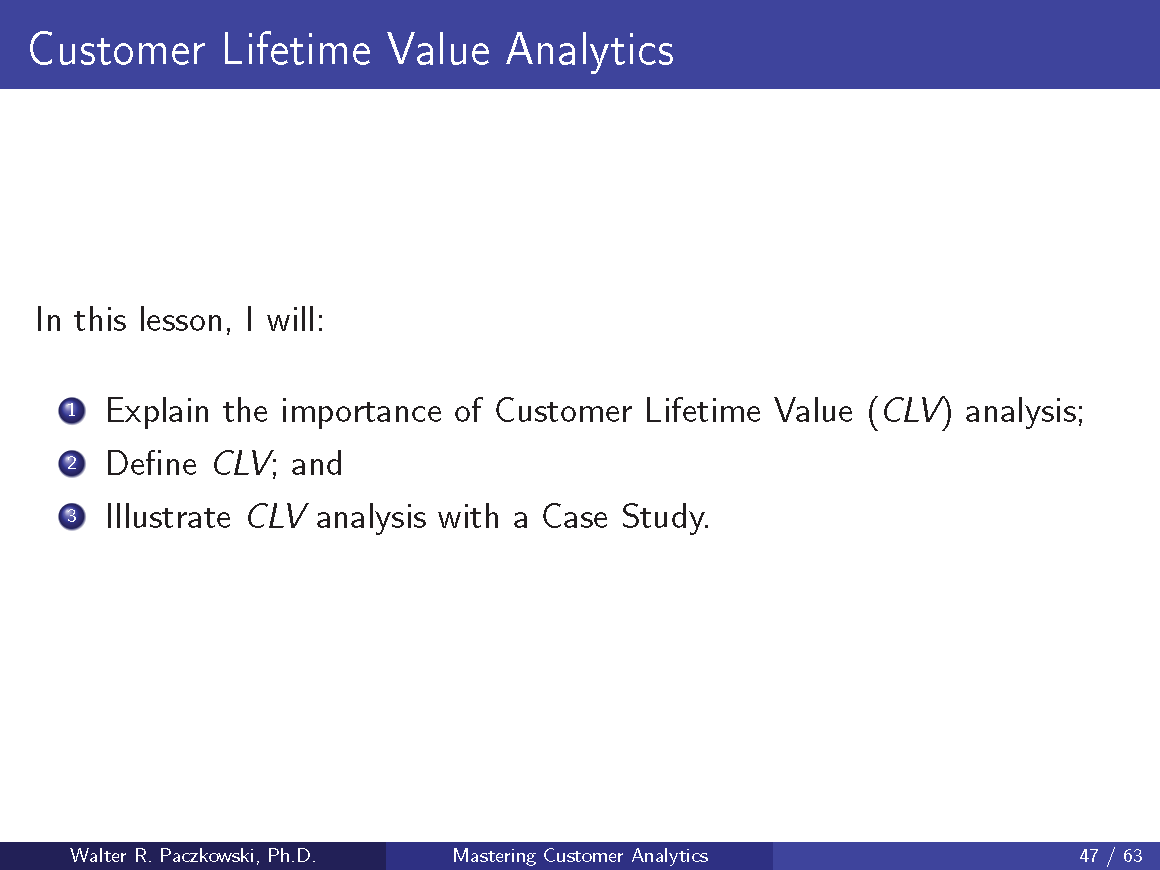

In [71]:
slide( '47' )

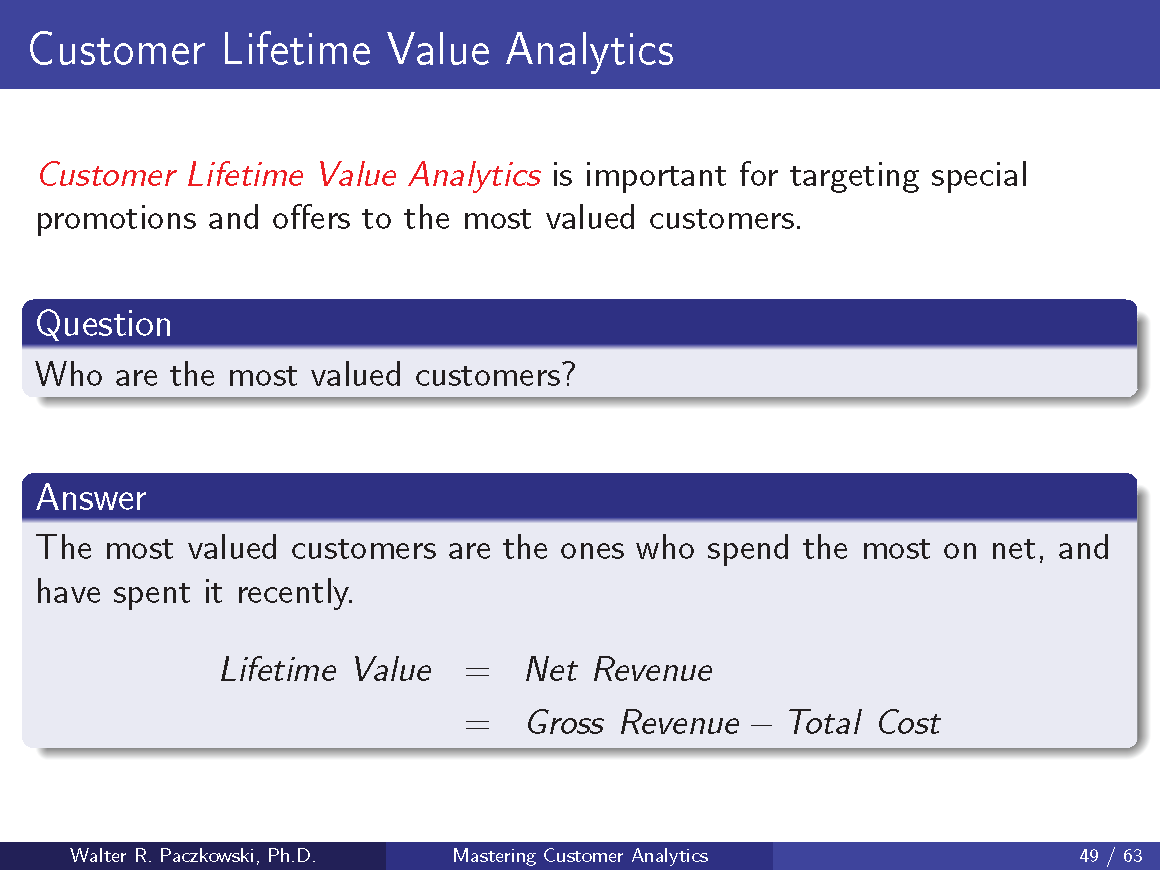

In [72]:
slide( '49' )

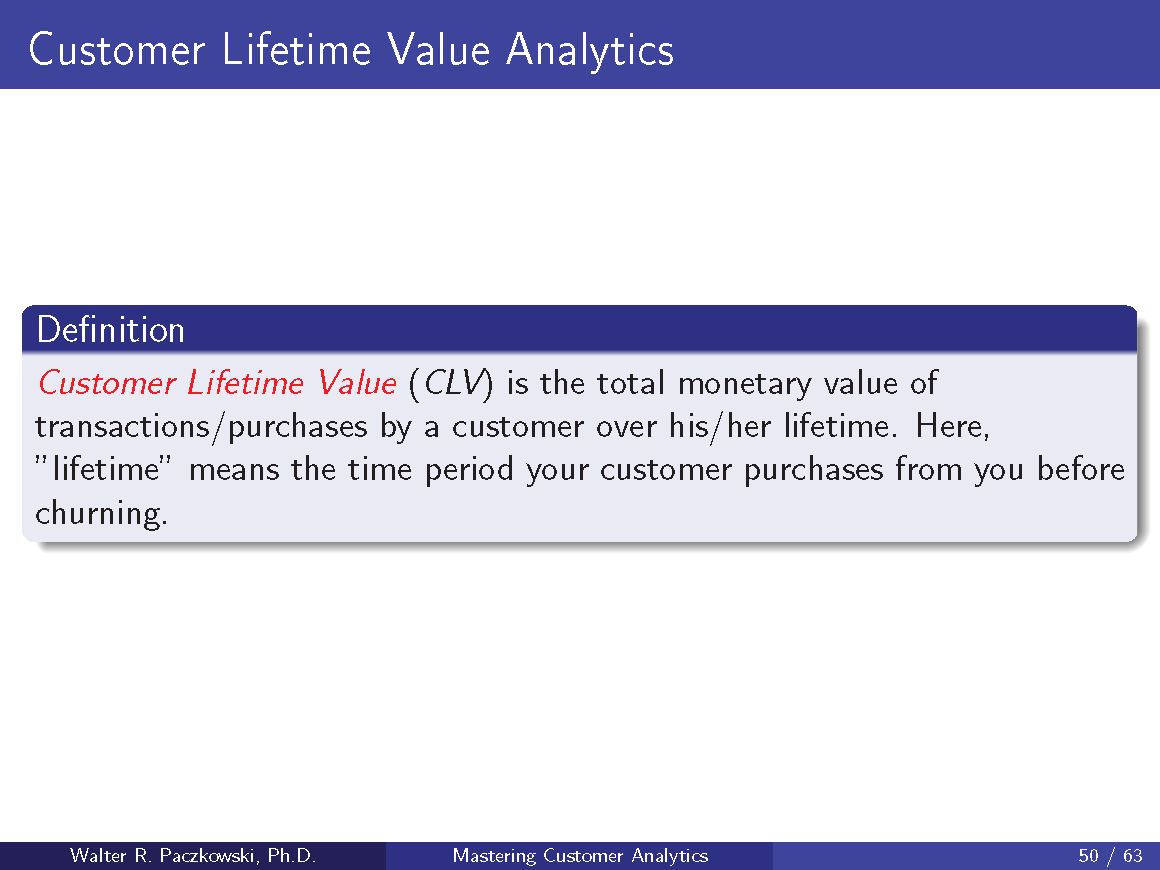

In [73]:
slide( '50' )

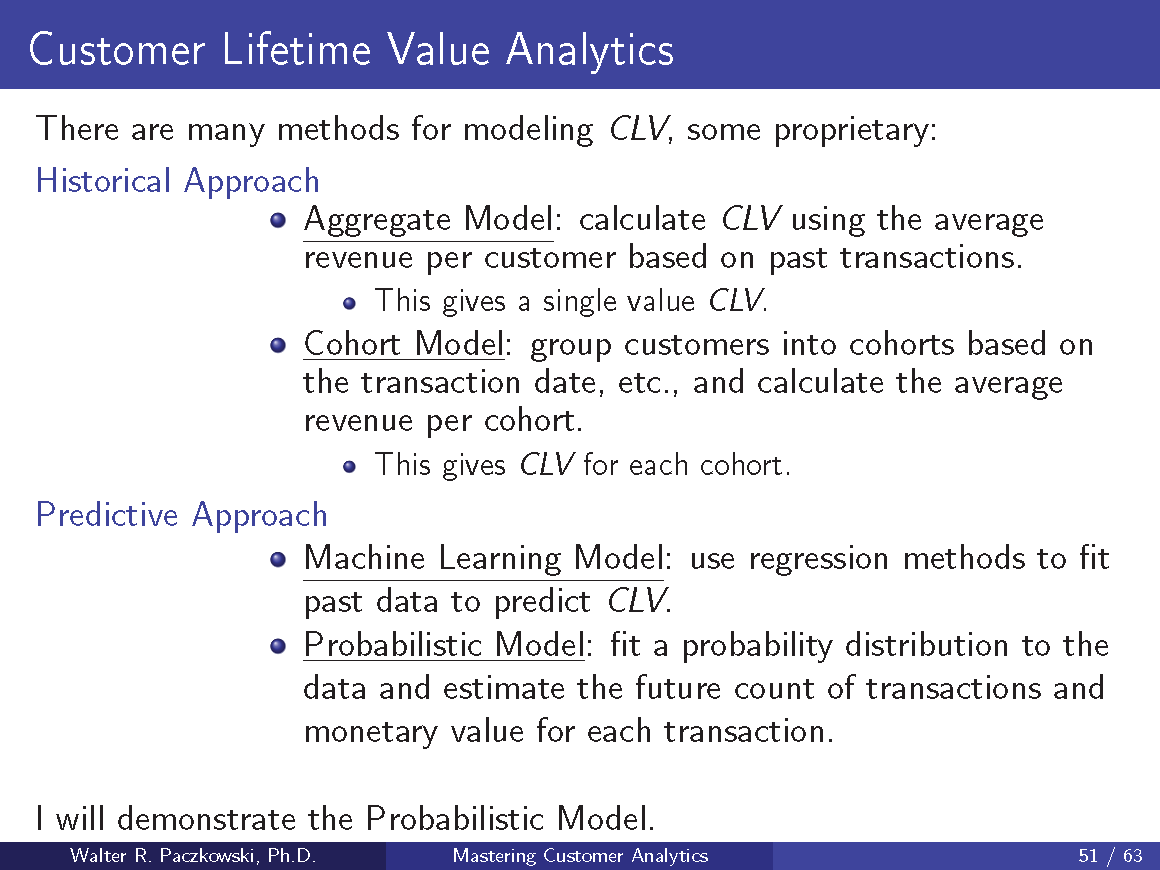

In [74]:
slide( '51' )

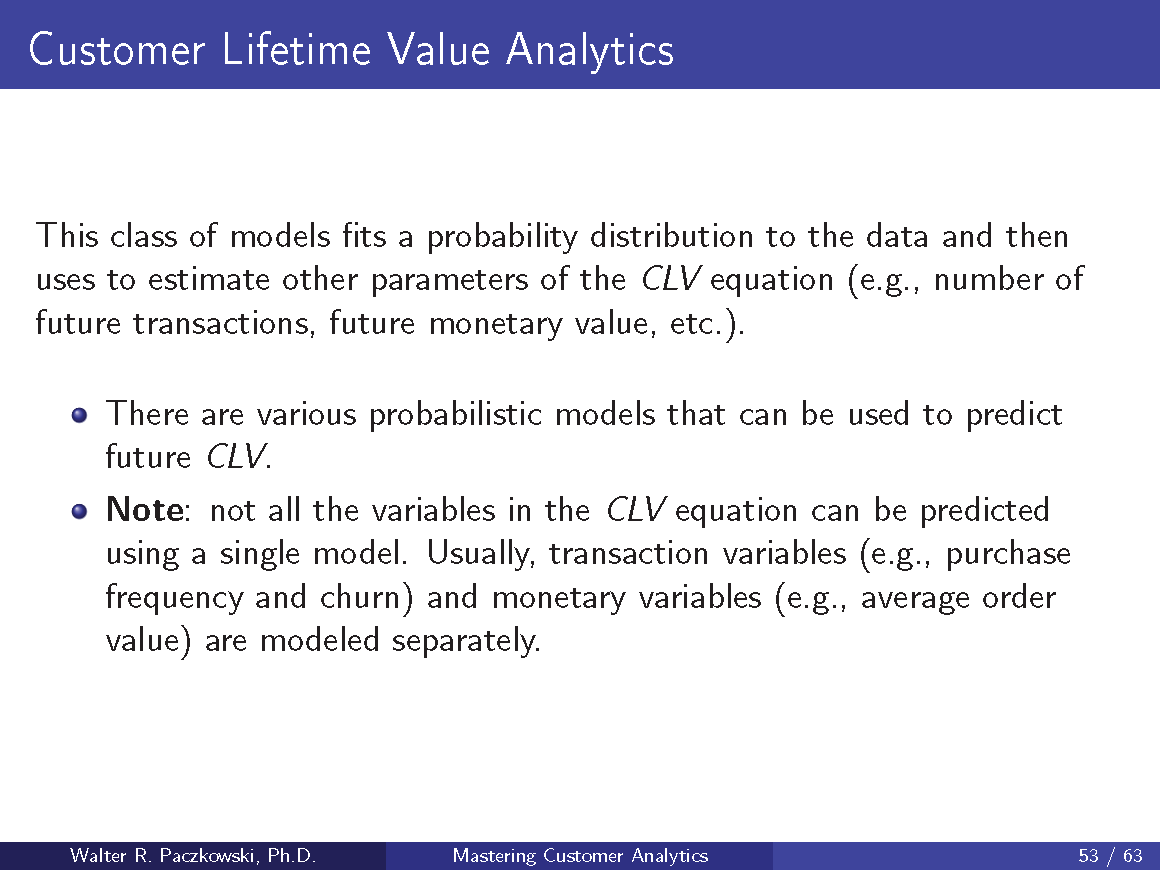

In [75]:
slide( '53' )

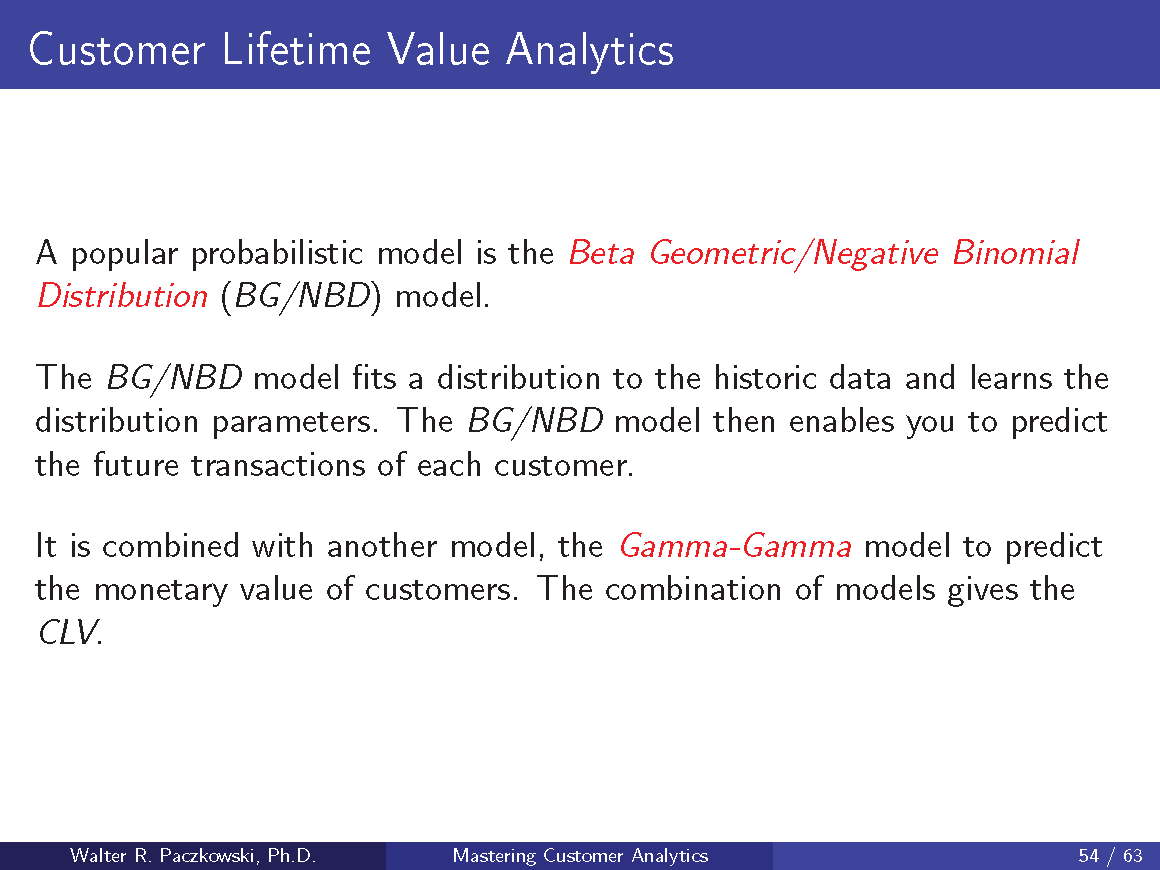

In [76]:
slide( '54' )

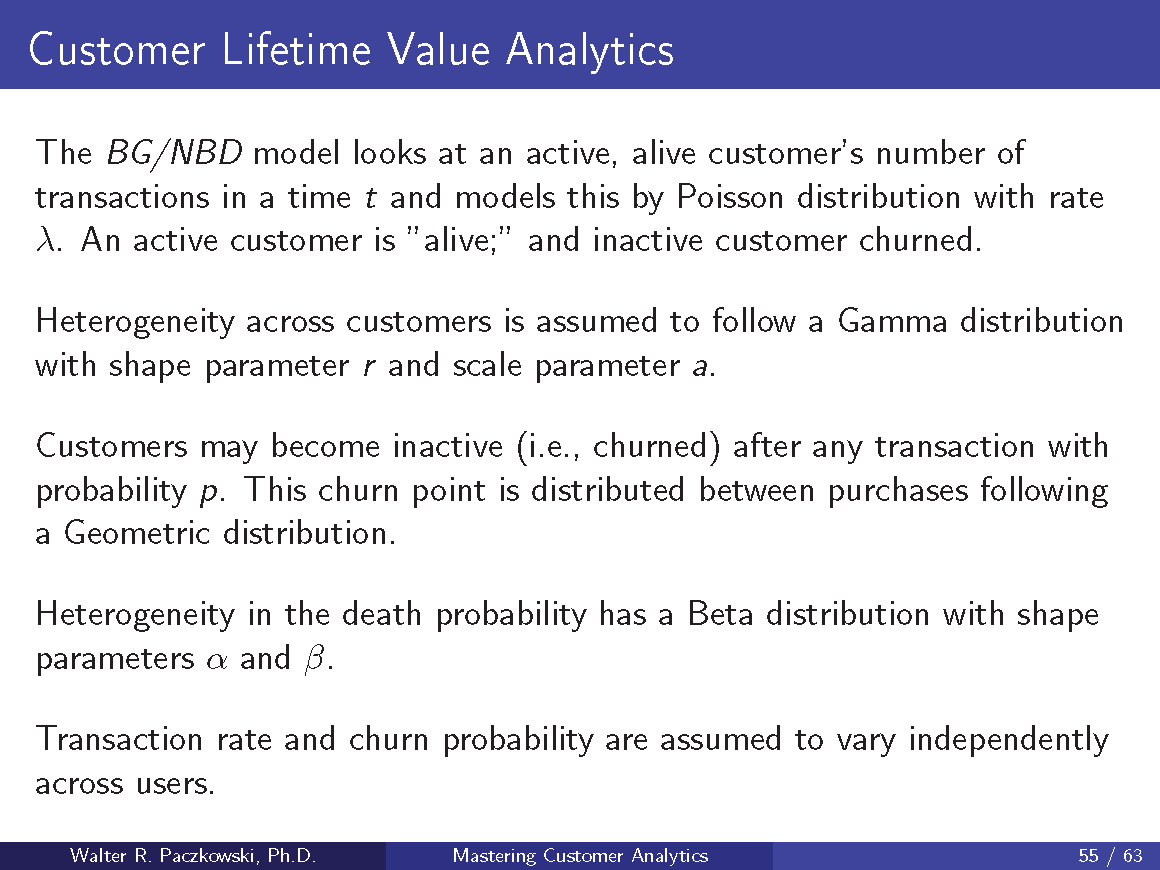

In [77]:
slide( '55' )

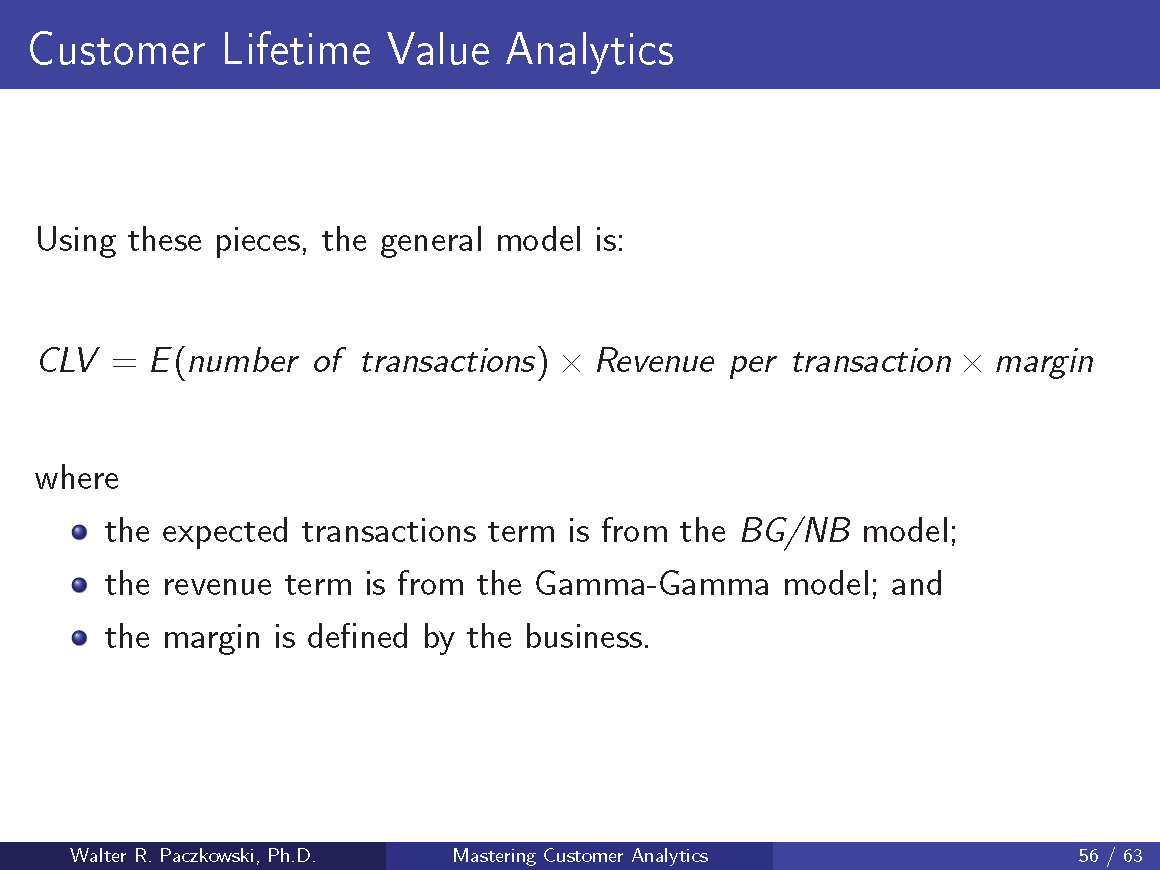

In [78]:
slide( '56' )

## CLV Case Study

[Back to Contents](#Contents)

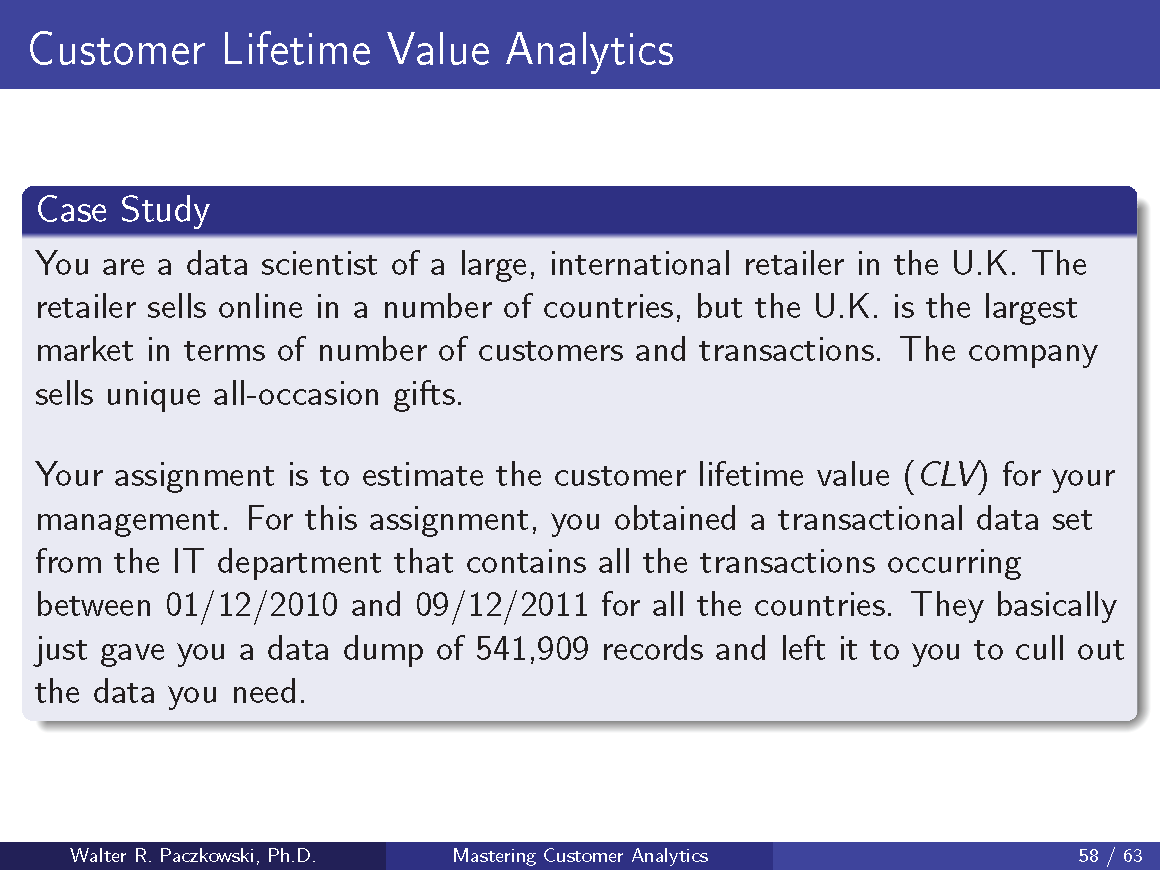

In [79]:
slide( '58' )

## CLV Data Dictionary

[Back to Contents](#Contents)

**Retail Sales Data**

| Variable | Values | Source | Mnemonic |
|----------|--------|--------|----------|
| Invoice Number | Nominal, a 6-digit integral number | UCI | InvoiceNo |
| Product (item) code | Nominal, a 5-digit integral number | UCI | StockCode |
| Product (item) name | String | UCI | Description |
| Quantities of each product (item) per transaction | Numeric | UCI | Quantity |
| Invoice Date and time | Numeric, day and time | UCI | InvoiceDate |
| Unit price | Numeric, price per unit in sterling | UCI | UnitPrice |
| Customer ID | Nominal, 5-digit integral number | UCI | CID |
| Country name | Nominal, name of the country of customer | UCI | Country |

Source: University of California Irvine Machine Learning Repository (*UCI*).

## Import, Examine, and Process the CLV Data

[Back to Contents](#Contents)

In [ ]:
##
## Import the data
##
file = 'onlineRetail.csv'
##
format_dict = {'UnitPrice':'${0:.2f}', 'CID':'{0:.0f}' }
df_retail = pd.read_csv( path + file, parse_dates = [ 'InvoiceDate' ] )
df_retail.rename( columns = { 'CustomerID':'CID' }, inplace = True )
display( df_retail.head().style.set_caption( 'Initial Data Download' ).set_table_styles( tbl_styles ).hide_index().\
       format( format_dict ) )
display( df_size( df_retail ) )

In [ ]:
## 
## Get country distribution
##
df_country = pd.DataFrame( df_retail.Country.value_counts( normalize = True ) )
df_country.rename( columns = {'Country':'Proportion'}, inplace = True ) 
df_country.head().style.set_caption( 'Country Representation' ).set_table_styles( tbl_styles ).\
    format( { 'Proportion':'{:,.1%}'} )

In [ ]:
##
## Subset UK
##
df_uk = df_retail.query( "Country == 'United Kingdom'" ).drop( labels = [ 'Country' ], axis = 1 )
display( df_uk.head().style.set_caption( 'Preprocessed Data' ).set_table_styles( tbl_styles ).
        hide_index().format( format_dict ) )
display( df_size( df_uk ) )

In [ ]:
##
## Display summary statistics
##
display( df_uk.describe().T.style.set_caption( 'Summary Statistics' ).set_table_styles( tbl_styles ).format( p_value ) )

**Interpretation**

Notice the negative quantity and price points.  These represent returns and are not positive business.  I'll delete all records with negative values.

In [ ]:
##
## Drop the records with negative data
##
df_uk = df_uk[ ( df_uk.Quantity > 0 ) & ( df_uk.UnitPrice > 0 ) ]
display( df_uk.describe().T.style.set_caption( 'Summary Statistics' ).set_table_styles( tbl_styles ).format( p_value ) )

In [ ]:
## 
## Check for missing values
##
mvReport( df_uk )

In [ ]:
##
## Drop all records with missing CIDs.  We need to know who the customers are so missing values are a problem.
##
df_uk.dropna( inplace = True )
mvReport( df_uk )

In [ ]:
##
## Calculate total revenue
##
format_dict.update( {'Revenue':'${0:.2f}'})
df_uk[ 'Revenue' ] = df_uk[ 'Quantity' ] * df_uk[ 'UnitPrice' ]
display( df_uk.head().style.set_caption( 'Retail Data' ).set_table_styles( tbl_styles ).\
        hide_index().format( format_dict ) )
display( df_uk.describe().T )

In [ ]:
##
## Print some DataFrame details
##
format_dict = {'total revenue':'${0:,.0f}', 'total quantity':'{0:,.0f}', 'unique customers':'{0:,.0f}'}
data = { 'min Date':df_uk.InvoiceDate.dt.date.min(), 'max Date':df_uk.InvoiceDate.dt.date.max(),
        'unique customers':df_uk.CID.nunique(), 'total quantity':df_uk.Quantity.sum(),
        'total revenue':df_uk.Revenue.sum() }
display( pd.DataFrame( data, index = [0] ).style.set_caption( 'Variable Summaries' ).\
        set_table_styles( tbl_styles ).hide_index().format( format_dict ) )


**Interpretation**

Notice that there are 3,920 unique customers.

## Model CLV

[Back to Contents](#Contents)


Use the *lifetimes* package.

Create a *Recency, Frequency and Monetary Value* (*RFM*) summary table from the transactions data.

The *summary_data_from_transactions_data* function in *lifetimes* package aggregates transaction level data and calculates for each customer:

>- **frequency**: the number of repeat purchases (more than 1 purchases).
>- **recency**: the time between the first and the last transaction.
>- **T**: the time between the first purchase and the end of the transaction period.
>- **monetary_value**: it is the mean of a given customer's sales value (i.e., Revenue).


In [ ]:
##
## Create summary data using summary_data_from_transaction_data function.
##
format_dict = { 'CID':'{0:.0f}', 'T':'{0:.0f}', 'frequency':'{0:.0f}', 'recency':'{0:.0f}', 'monetary_value':'${0:,.2f}'}
summary = lifetimes.utils.summary_data_from_transaction_data( df_uk, 'CID', 'InvoiceDate', 'Revenue' )
summary = summary.reset_index()
base = summary.shape[ 0 ]
display( summary.head().style.set_caption( 'RFM Summary Data' ).set_table_styles( tbl_styles ).format( format_dict ).hide_index() )
boldprt( f'Base: {base} customers' )

**Interpretation**

Notice that the monetary value is based on the calculated Revenue (unit sales $\times$ price).  This is not net profit.

The value 0 for frequency and recency means these are one-time buyers. Let's check how many such one-time buyers there are in the DataFrame.

In [ ]:
##
## Plot distribution of frequency
##
ax = summary[ 'frequency' ].plot( kind = 'hist', bins = 50 )
ax.set_title( 'Frequency Distribution', fontsize = font_title )
boldprt( 'Summary Statistics\n')
print( summary[ 'frequency' ].describe() )
print( "-"*60 )
one_time_buyers = round( sum( summary[ 'frequency' ] == 0)/float( len( summary ) )*( 100 ), 2 )
print( f"Percentage of customers purchase the item once: {one_time_buyers}%" )

*BG/NBD* model is available as *BetaGeoFitter* class in *lifetimes* package.

In [ ]:
##
## Fit the BG/NBD model
##
## ===> Step 1: Instantiate the model <===
##
bgf = lifetimes.BetaGeoFitter( penalizer_coef = 0.0 )
##
## ===> Step 2: Fit the model <===
##
bgf01 = bgf.fit( summary[ 'frequency' ], summary[ 'recency' ], summary[ 'T' ] )
##
## ===> Step 3: Summarize the model <===
##
display( bgf.summary.style.set_caption( 'BG/NBD Model Summary' ).set_table_styles( tbl_styles ).format( p_value ) )
boldprt( 'Base: Model bgf01' )

Suppose you want to know whether a customer is alive or not (i.e., predict customer churn) based on the historical data. Use *model.conditional_probability_alive()* in *lifetimes* to compute the probability that a customer with the 3-tuple  history (frequency, recency, T) is currently alive.  You can then plot this using *plot_probabilty_alive_matrix(model)*.

In [ ]:
##
## Compute the customer alive probability
##
format_dict.update( {'probability_alive':'{0:.3f}'})
summary['probability_alive'] = bgf.conditional_probability_alive( summary[ 'frequency' ],\
                                        summary[ 'recency' ], summary[ 'T' ] )
display( summary.head(10).style.set_caption( "Customer 'Alive' Probability" ).set_table_styles( tbl_styles ).\
        hide_index().format( format_dict ) )
boldprt( 'Base: Model bgf01' )

In [ ]:
##
## Set threshold for classifying customers as alive or dead:
##   probability_alive > theta, then Alive; else, Churned 
##
theta = 0.75
##
## Score customers
##
base = summary.shape[ 0 ]
summary[ 'Alive' ] = [ 'Alive' if x > theta else 'Churned' for x in summary.probability_alive ]
display( summary.head(10).style.set_caption( "Customer 'Alive' Status" ).set_table_styles( tbl_styles ).hide_index().format( format_dict ) )
boldprt( f'Base: {base} customers' )

**Interpretation**

The probabilty of being alive is calculated based on the recency and frequency of a customer. So,

>1. If a customer has bought multiple times (frequency) and the time between first & last transaction is high (recency), then his/her probability being alive is high.
>2. If a customer has less frequency (bought once or twice) and the time between first & last transaction is low (recency), then his/her probability being alive is high.

In [ ]:
##
## Examine Alive/Churn status
##
status = summary.Alive.value_counts( normalize = True )
tmp = pd.DataFrame( status )
tmp.rename( columns = { "Alive": "Status" }, inplace = True )
display( tmp.style.set_caption( "Alive/Churn Status" ).set_table_styles( tbl_styles ).format( format ) )

## Predict with the CLV Model

[Back to Contents](#Contents)

Use the trained model to predict the likely future transactions of each customer.  Use the *conditional_expected_number_of_purchases_up_to_time* method in *lifetimes.*

In [ ]:
##
## Predict transactions for the next 30 days based on historical data
##
## Set steps-ahead parameter
##
t = 30
##
## Predict
##
summary[ 'predicted_trans' ] = round( bgf.conditional_expected_number_of_purchases_up_to_time\
                                ( t, summary[ 'frequency' ], summary[ 'recency' ], summary[ 'T' ] ), 2 )
##
format_dict.update( {'predicted_trans':'{0:.2f}'})
summary_sorted = summary.sort_values( by = 'predicted_trans', ascending = False )
display( summary_sorted.head().\
       style.set_caption( 'Predicted Future Transactions: 30 Days Ahead' ).set_table_styles( tbl_styles ).\
       hide_index().format( format_dict ) )

## Model CLV Monetary Value

[Back to Contents](#Contents)

In [ ]:
##
## Check the relationship between frequency and monetary_value
##
return_customers_summary = summary[ summary[ 'frequency' ] > 0 ]
base = 'Base: ' + str( return_customers_summary.shape[ 0 ] ) + ' customers'
display( return_customers_summary.head().style.set_caption( 'Predicted Transactions' ).set_table_styles( tbl_styles ).\
        hide_index().format( format_dict ) )
boldprt( base )

In [ ]:
##
## Check correlation between frequency and monetary_value
##
cols = ['frequency', 'monetary_value']
display( return_customers_summary[ cols ].corr().style.set_caption( 'Correlation Between Frequency & Value' ).\
        set_table_styles( tbl_styles ).format( '{:0.2f}' ) )

**Interpretation**

The correlation are very weak. Hence, the assumption is satisfied and we can fit the model to our data.

In [ ]:
## 
## Model the monetary value using the Gamma-Gamma Model
##
## ===> Step 1: Instantiate the model <===
##
ggf = lifetimes.GammaGammaFitter( penalizer_coef = 0.001 )
##
## ===> Step 2: Fit the model <===
##
ggf01 = ggf.fit( return_customers_summary[ 'frequency' ], return_customers_summary[ 'monetary_value' ] )
##
## ===> Step 3: Summarize the model <===
##
display( ggf.summary.style.set_caption( 'GGF Model Summary' ).set_table_styles( tbl_styles ).format( p_value ) )
boldprt( 'Base: Model ggf01' )

Predict the expected average profit for each transaction and the *CLV* using the model. Use:

>1. *model.conditional_expected_average_profit()*: This method computes the conditional expectation of the average profit per transaction for a group of one or more customers.
>2. *model.customer_lifetime_value()*: This method computes the average lifetime value of a group of one or more customers. This method takes the *BG/NBD* model and the prediction horizon as a parameter to calculate the *CLV*.

In [ ]:
##
## Calculate the conditional expected average profit for each customer per transaction
##
format_dict.update( {'exp_avg_sales':'${0:,.2f}'})
summary = summary[summary['monetary_value'] >0]
summary['exp_avg_sales'] = ggf.conditional_expected_average_profit(summary['frequency'],
                                       summary['monetary_value'])
display( summary.head().style.set_caption( 'Summary Measures' ).set_table_styles( tbl_styles).\
        hide_index().format( format_dict ) ) 

**Interpretation**

The expected average sales is based on the actual sales value, not profit. We can use the model to get *predicted CLV* and then multiply that by a profit margin to get a profit value.

In [ ]:
##
## Predict CLV for the next 30 days; set discount rate to 1% (0.01)
##
format_dict.update( {'predicted_clv':'${0:,.2f}'})
summary[ 'predicted_clv' ] = ggf.customer_lifetime_value( bgf, summary[ 'frequency' ], summary[ 'recency' ], summary[ 'T' ],\
                                                       summary[ 'monetary_value' ], 
                                                       time = 1,             # lifetime in months
                                                       freq = 'D',           # frequency in which the data is present(T)      
                                                       discount_rate = 0.01  # discount rate
                                                    )
display( summary.head().style.set_caption( 'Summary' ).set_table_styles( tbl_styles).hide_index().format( format_dict ) ) 

**Interpretation**

The predicted *CLV* is sales volume.  Need to calculate net profit using the profit margin.

In [ ]:
##
## Calculate CLV in terms of net profit for each customer (profit margin = 5%)
## Net profit for each customer is sales value times profit margin.
##
profit_margin = 0.05
##
format_dict.update( {'CLV':'${0:,.2f}'})
summary[ 'CLV' ] = summary[ 'predicted_clv' ] * profit_margin
display( summary.head().style.set_caption( 'Summary' ).set_table_styles( tbl_styles).\
        hide_index().format( format_dict ) ) 

In [ ]:
##
## Display the distribution of CLV for the next 30 days
##
display( summary[ 'CLV' ].describe() )

<div class="alert alert-info" role="alert">
    
<font color = black>Summary and Wrap-up
---------------------------------------
    
[Back to Contents](#Contents)  
    
</div>


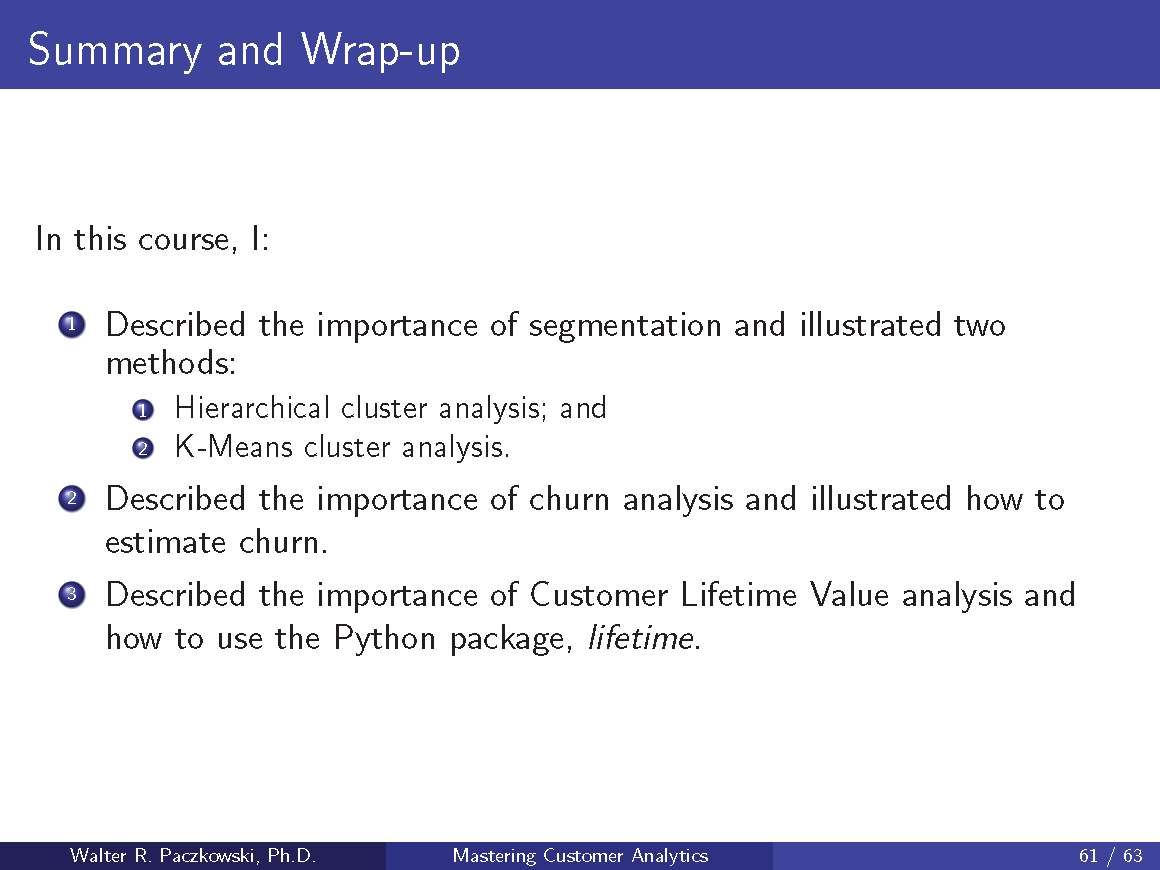

In [80]:
slide( '61' )

<div class="alert alert-info" role="alert">
    
<font color = black>Contact Information
---------------------------------------
    
[Back to Contents](#Contents)  
    
</div>

If you have any questions after this course, please do not hesitate to contact me.

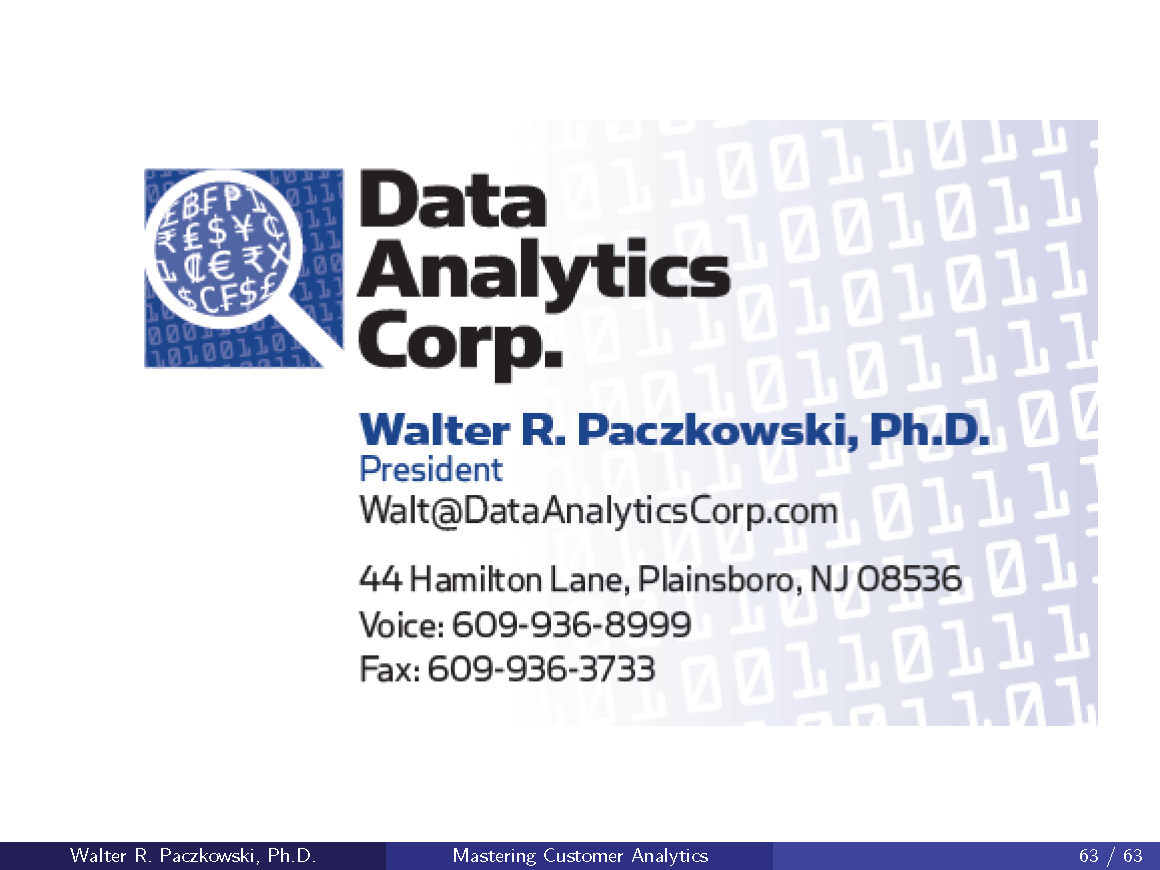

In [81]:
slide( '63' )

<div class="alert alert-info" role="alert">
    
<font color = black>Exercise Solutions
--------------------------------------
    
[Back to Contents](#Contents)  
    
</div>


### Solution II.1

[Return to Exercise II.1](#Exercise-II.1)

Import a *CSV* data set of bank customers.  The *CSV* file is named *BankChurners.csv*.  HINT: Use *pd.read_csv*.  Call the imported DataFrame *df_bank*.  

| Variable  | Values  | Source  | Mnemonic |
|-----------|---------|---------|----------|
| Customer ID | Unique identifier | Bank | CID |
| Attrition Flag | String: Existing Customer, Attrited Customer | Bank | Attrition_Flag | 
| Customer Age | Integer | Bank | Age | 
| Customer Gender | Single Character: F = Female, M = Male | Bank | Gender |
| Number of Household Dependents | Interger: 0, 1, 2, ... | Bank | Dependent_count |
| Education Level | String | Bank | Education_Level |
| Marital Status | String | Bank | Marital Status |
| Income Category | String | Bank | Income_Category |
| Type of Bank Card | String | Bank | Card_Category |
| Months as Customer | Integer | Bank | Months_on_Book |
| Total Number of Products Held by Customer | Integer | Bank | Total_Relationship_Count |
| No. of Months Inactive in Last 12 Months | Integer | Bank | Months_Inactive_12_mon |
| No. of Contacts in Last 12 Months | Interger: 0, 1, 2, ... | Bank | Contacts_Count_12_mon |
| Credit Limit on the Credit Card | Integer | Bank | Credit_Limit |
| Total Revolving Balance on the Credit Card | Integer | Bank | Total_Revolving_Bal |
| Open to Buy Credit Line (Average of last 12 months) | Integer | Bank | Avg_Open_To_Buy |
| Change in Transaction Amount (Q4 over Q1) | Float | Bank | Total_Amt_Chng_Q4_Q1 |
| Total Transaction Amount (Last 12 months) | Integer | Bank |
| Total Transaction Count (Last 12 months) | Integer | Bank | Total_Trans_Amt |
| Change in Transaction Count (Q4 over Q1) | Float | Bank | Total_Ct_Chng_Q4_Q1 |
| Average Card Utilization Ratio | Float | Bank | Avg_Utilization_Ratio |

Use the following demographic variables to create a Hierarchical Cluster of the bank customers:

>- Age
>- Gender
>- Card_Category

This problem is a little tricky.  First, I recommend subsetting the three variables into a temporary DataFrame: *tmp*.  Second, *Gender* and *Card_Category* are character strings so they have to be recoded.  You can use a list comprehension to recode both.  Suggestions:
>- tmp[ 'Gender' ] = [ 1 if x == 'M' else 0 for x in tmp.Gender ]
>- tmp[ 'Card_Category' ] = [ 1 if x == 'Blue' else 2 if x == 'Silver' else 3 if x == 'Gold' else 4 for x in tmp.Card_Category ]

Finally, the DataFrame is very large, so I recommend taking a random sample of $n = 500$.  You can use:

>- smpl = tmp.sample( n = 500, random_state = 42, replace = False )

In [ ]:
##
## Enter code here
##
file = 'BankChurners.csv'
df_bank = pd.read_csv( path + file )
df_bank.head()

In [ ]:
##
## Enter code here
##
cols = [ 'Age', 'Gender', 'Card_Category' ]
tmp = df_bank[ cols ].copy()
##
## Recode data
tmp[ 'Gender' ] = [ 1 if x == 'M' else 0 for x in tmp.Gender ]
tmp[ 'Card_Category' ] = [ 1 if x == 'Blue' else 2 if x == 'Silver' else 3 if x == 'Gold' else 4 for x in tmp.Card_Category ]
##
display( tmp.head() )
##
## Draw a random sample of size n = 500
## Put the sample in a new DataFrame.
##
smpl = tmp.sample( n = 500, random_state = 42, replace = False )
##
ward = shc.linkage( smpl, method = 'ward' )
##
## Plot a dendogram
## WARNING: this will take a few minutes
##
max_dist = 50
##
plt.figure( figsize = ( 10, 7  ) )  
plt.title( 'CID Clustering\nHierarchical Clustering Dendrogram\nWard\'s Method' )
plt.xlabel( 'Customer (CID)' )
plt.ylabel( 'Distance' )
plt.text( 2500, max_dist + 0.5, 'Cut-off Line' )
##
shc.dendrogram( ward )
plt.axhline( y = max_dist, c = 'black', ls = '-', lw = 1.5 );

### Solution II.2

[Return to Exercise II.2](#Exercise-II.2)

Use the bank DataFrame to do a K-Means clustering.  Use the following numeric variables:

>- Months_on_Book
>- Total_Relationship_Count
>- Months_Inactive_12_mon
>- Contacts_Count_12_mon
>- Credit_Limit

Use a random sample of $n = 500$.

In [ ]:
cols = [ 'Months_on_Book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit' ]
tmp = df_bank[ cols ].copy()
display( tmp.head() )
##
## Do K-Means
##
kmeans = KMeans( n_clusters = 4, random_state = 42 ).fit( tmp )
## 
## Add cluster labels to main cluster DataFrame
##
tmp[ 'Cluster_Number' ] = kmeans.labels_   ## Notice the ending underscore
##
display( tmp.head() )
display( tmp.Cluster_Number.value_counts( normalize = True ) )

### Solution III.1

[Return to Exercise III.1](#Exercise-III.1)

Split the Bank DataFrame into train and testing data sets using $\frac{3}{4}$ for training.


In [ ]:
##
## Use 75% train
##
bank_train, bank_test = train_test_split( df_bank, train_size = 0.75, random_state = 42 )
display( df_size( bank_train ) )
display( df_size( bank_test ) )

### Solution III.2

[Return to Exercise III.2](#Exercise-III.2)

Train a bank attrition (i.e., churn) model.  The dependent variable is *Attrition_Flag*.  Recode this as 1 if the account is closed; else 0.  Use a list comprehension for this.  Use the following numeric variables for the independent variable or *features*:

>- Months_on_Book
>- Total_Relationship_Count
>- Months_Inactive_12_mon
>- Contacts_Count_12_mon
>- Credit_Limit

Call the fitted model *bank_logit01*. 


In [ ]:
##
## Subset the data
##
cols = [ 'Attrition_Flag', 'Months_on_Book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
        'Contacts_Count_12_mon', 'Credit_Limit' ]
tmp = bank_train[ cols ].copy()
tmp[ 'Attrition_Flag' ] = [ 1 if x == 'Attrited Customer' else 0 for x in tmp.Attrition_Flag ]
display( tmp.head() )
##
## ===> Step 1: Define a formula <===
##
formula = 'Attrition_Flag ~ Months_on_Book + Total_Relationship_Count + Months_Inactive_12_mon + \
    Contacts_Count_12_mon + Credit_Limit' 
##
## ===> Step 2: Instantiate the logit model <===
##
mod = smf.logit( formula, data = tmp )
##
## ===> Step 3: Fit the instantiated model <===
##
bank_logit01 = mod.fit()
##
## ===> Step 4: Summarize the fitted model <===
##
display( bank_logit01.summary() )

<div class="alert alert-info" role="alert">
    
<font color = black>End Exercise Solutions
--------------------------------------
    
[Back to Contents](#Contents)  
    
</div>
